# Dados Brutos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/dallaqua/Trabalho_Santander_Coders_TPI/main/State_of_data_2022.csv?token=GHSAT0AAAAAACF5XZ2S5HG4MWLQJ6IDNXJGZG7PIFQ', sep = ',')

In [4]:
dados.head(3)

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')","('P1_i_1 ', 'uf onde mora')","('P1_i_2 ', 'Regiao onde mora')","('P1_j ', 'Mudou de Estado?')","('P1_k ', 'Regiao de origem')","('P1_l ', 'Nivel de Ensino')","('P1_m ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_2 ', 'Salário atual não corresponde ao mercado')","('P2_l_3 ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_4 ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_5 ', 'Gostaria de receber mais benefícios')","('P2_l_6 ', 'O clima de trabalho/ambiente não é bom')","('P2_l_7 ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_1 ', 'Remuneração/Salário')","('P2_o_2 ', 'Benefícios')","('P2_o_3 ', 'Propósito do trabalho e da empresa')","('P2_o_4 ', 'Flexibilidade de trabalho remoto')","('P2_o_5 ', 'Ambiente e clima de trabalho')","('P2_o_6 ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_7 ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_8 ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_9 ', 'Qualidade dos gestores e líderes')","('P2_o_10 ', 'Reputação que a empresa tem no mercado')","('P2_p ', 'Atualmente qual a sua forma de trabalho?')","('P2_q ', 'Qual a forma de trabalho ideal para você?')","('P2_r ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P2_s ', 'Sua empresa passu por Layoff em 2022?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_b_1 ', 'Analytics Engineer')","('P3_b_2 ', 'Engenharia de Dados/Data Engineer')","('P3_b_3 ', 'Analista de Dados/Data Analyst')","('P3_b_4 ', 'Cientista de Dados/Data Scientist')","('P3_b_5 ', 'Database Administrator/DBA')","('P3_b_6 ', 'Analista de Business Intelligence/BI')","('P3_b_7 ', 'Arquiteto de Dados/Data Architect')","('P3_b_8 ', 'Data Product Manager/DPM')","('P3_b_9 ', 'Business Analyst')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_c_1 ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_2 ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_3 ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_4 ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_5 ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_6 ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as

Perguntas possíveis:

Dados Gerais
- idade
- gênero
- ensino / formação acadêmica

Carreira
- modo de trabalho (remoto, presencial, híbrido)

Satisfação (opcional)
- satisfação / insatisfação
- motivos da insatisfação (gráfico comparativo barras)

Densidade geográfica
- Densidade de profissionais por estado
- Densidade de profissionais por gênero
- Densidade de profissionais por raça
- Densidade de profissionais pcd

Salário
- geral
- por cargo
- por tempo de carreira
- por gênero
- pcd
- por raça

Fontes de dados utilizados no trabalho

Tecnologias utilizadas
- linguagens no geral
- 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?' -> P4_e
- P4_g -> opções de cloud
- na área de ciência, engenharia e analista (tecnologias por nicho)

- procurar insights com a parte de ciência de dados - P8


obs: sobre os NaN, considerar apenas as pessoas que responderam

# Explicação do DataSet

~ explicação do kaggle

# Filtrando dados

In [5]:
# Removendo o ID
dados = dados.drop("('P0', 'id')", axis = 1)

In [6]:
# Separando por partes
parte_1 = dados.filter(like = 'P1', axis = 1)
parte_2 = dados.filter(like = 'P2', axis = 1)
parte_3 = dados.filter(like = 'P3', axis = 1)
parte_4 = dados.filter(like = 'P4', axis = 1)
parte_5 = dados.filter(like = 'P5', axis = 1)
parte_6 = dados.filter(like = 'P6', axis = 1)
parte_7 = dados.filter(like = 'P7', axis = 1)
parte_8 = dados.filter(like = 'P8', axis = 1)

# Parte 1 - Como é o profissional de Dados?

([<matplotlib.patches.Wedge at 0x7d231210f790>,
 [Text(0.7832451088357187, 0.772351668273542, 'Feminino'),
  Text(-0.7900461291343092, -0.765393437285619, 'Masculino'),
  Text(1.0999569679494896, -0.009729782082127532, 'Não informado')],
 [Text(0.4272246048194829, 0.42128272814920464, '24.8%'),
  Text(-0.4309342522550777, -0.4174873294285194, '74.9%'),
  Text(0.5999765279724488, -0.005307153862978653, '0.3%')])

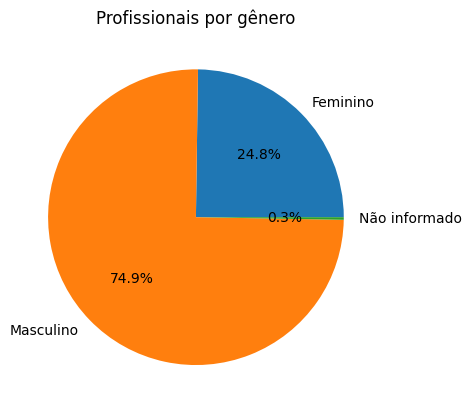

In [8]:
genero = parte_1.groupby("('P1_b ', 'Genero')")["('P1_b ', 'Genero')"].count()
labels = 'Feminino', 'Masculino',  'Não informado'
plt.title('Profissionais por gênero')
plt.pie(genero, labels = labels, autopct='%1.1f%%')

Ao examinarmos o perfil dos profissionais na área de Dados, observamos uma significativa disparidade: cerca de 75% são homens, 24.8% são mulheres, e uma proporção ainda menor não especificou o gênero. Esse padrão se estende para as outras áreas de TI, onde, segundo a Pesquisa Nacional por Amostra de Domicílios (PNAD) apenas 20% dos profissionais de TI são mulheres.

Além disso, a maioria dos profissionais concentra-se na faixa etária de 25 a 34 anos e apresenta um elevado nível educacional, abrangendo graduação e pós-graduação.

Text(0.5, 1.0, 'Profissionais por idade')

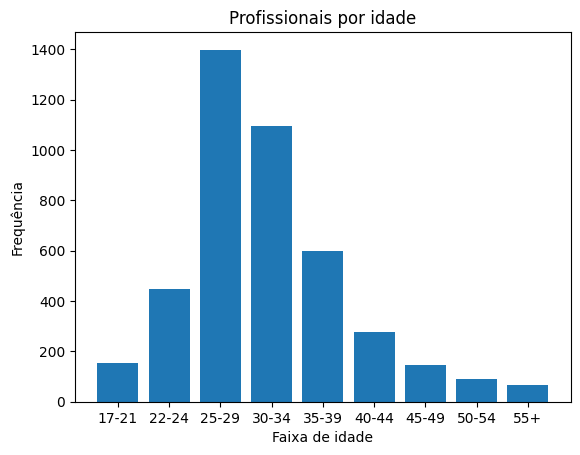

In [21]:
ax = plt.bar(data = parte_1, x = parte_1.groupby("('P1_a_1 ', 'Faixa idade')")["('P1_a_1 ', 'Faixa idade')"].count().index,
        height = parte_1.groupby("('P1_a_1 ', 'Faixa idade')")["('P1_a_1 ', 'Faixa idade')"].count().values)
plt.xlabel('Faixa de idade')
plt.ylabel('Frequência')
plt.title('Profissionais por idade')

Text(0.5, 1.0, 'Profissionais por escolaridade')

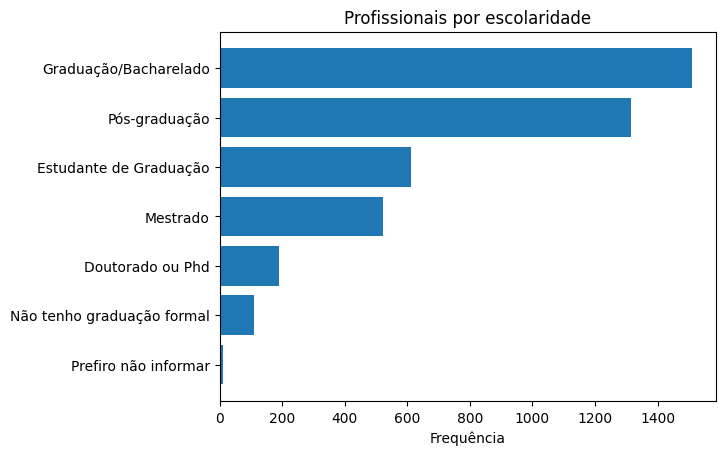

In [22]:
index = parte_1.groupby("('P1_l ', 'Nivel de Ensino')")["('P1_l ', 'Nivel de Ensino')"].count().sort_values(ascending=True).index
values = parte_1.groupby("('P1_l ', 'Nivel de Ensino')")["('P1_l ', 'Nivel de Ensino')"].count().sort_values(ascending=True).values
plt.xlabel('Frequência')
plt.barh(index, values)
plt.title('Profissionais por escolaridade')

Text(0.5, 1.0, 'Profissionais por cor/raça/etnia')

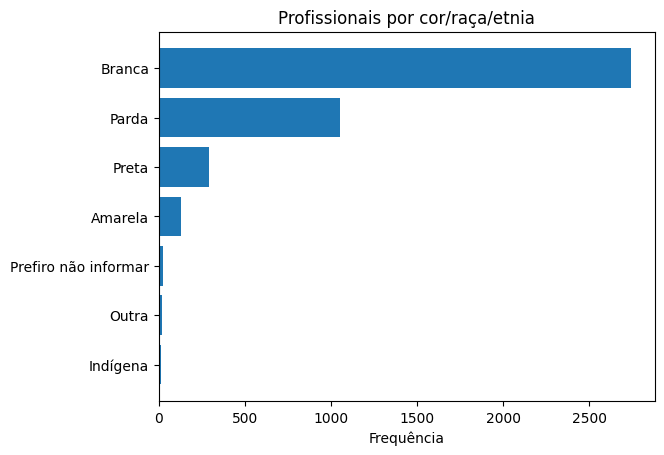

In [23]:
index = parte_1.groupby("('P1_c ', 'Cor/raca/etnia')")["('P1_c ', 'Cor/raca/etnia')"].count().sort_values(ascending=True).index
values = parte_1.groupby("('P1_c ', 'Cor/raca/etnia')")["('P1_c ', 'Cor/raca/etnia')"].count().sort_values(ascending=True).values
plt.xlabel('Frequência')
plt.barh(index, values)
plt.title('Profissionais por cor/raça/etnia')

A análise dos dados coletados pela pesquisa revela uma clara predominância de profissionais que se autodeclaram como brancos. Essa tendência levanta questões sobre a diversidade e inclusão na área de dados, destacando a necessidade de esforços para tornar o campo mais representativo de diferentes grupos étnicos.

# Parte 2 - Situação de trabalho

Text(0.5, 1.0, 'Salário mensal em reais')

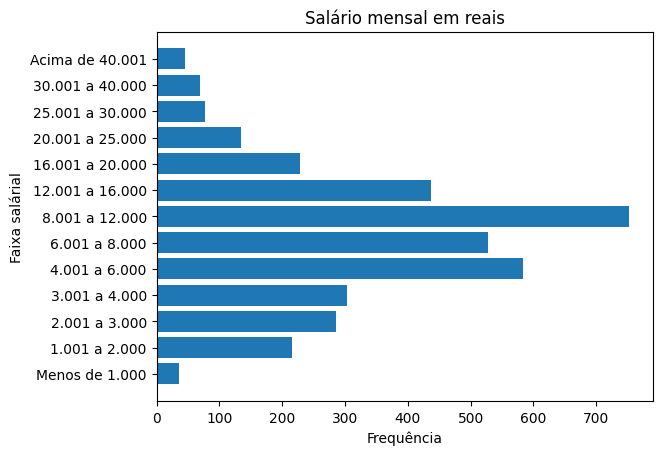

In [25]:
series_salarios = parte_2.groupby("('P2_h ', 'Faixa salarial')")["('P2_h ', 'Faixa salarial')"].count()
faixas_ordenadas = ['Menos de R$ 1.000/mês',
                    'de R$ 1.001/mês a R$ 2.000/mês',
                    'de R$ 2.001/mês a R$ 3.000/mês',
                    'de R$ 3.001/mês a R$ 4.000/mês',
                    'de R$ 4.001/mês a R$ 6.000/mês',
                    'de R$ 6.001/mês a R$ 8.000/mês',
                    'de R$ 8.001/mês a R$ 12.000/mês',
                    'de R$ 12.001/mês a R$ 16.000/mês',
                    'de R$ 16.001/mês a R$ 20.000/mês',
                    'de R$ 20.001/mês a R$ 25.000/mês',
                    'de R$ 25.001/mês a R$ 30.000/mês',
                    'de R$ 30.001/mês a R$ 40.000/mês',
                    'Acima de R$ 40.001/mês'
                    ]

labels = ['Menos de 1.000',
          '1.001 a 2.000',
          '2.001 a 3.000',
          '3.001 a 4.000',
          '4.001 a 6.000',
          '6.001 a 8.000',
          '8.001 a 12.000',
          '12.001 a 16.000',
          '16.001 a 20.000',
          '20.001 a 25.000',
          '25.001 a 30.000',
          '30.001 a 40.000',
          'Acima de 40.001']

series_salarios_reordenadas = series_salarios[faixas_ordenadas]
plt.barh(labels, series_salarios_reordenadas.values)
plt.xlabel('Frequência')
plt.ylabel('Faixa salárial')
plt.title('Salário mensal em reais')

Ao analisar o gráfico, percebemos que muitos profissionais na área têm salários mais altos do que a média no Brasil, que foi cerca de R$ 2.449 em 2021, de acordo com a Pnad. Isso sugere que os profissionais de dados estão sendo bem remunerados em comparação com outros setores. Isso pode ser devido à demanda por suas habilidades especializadas e à importância crescente dos dados em várias indústrias.

Text(0.5, 0, 'Frequência')

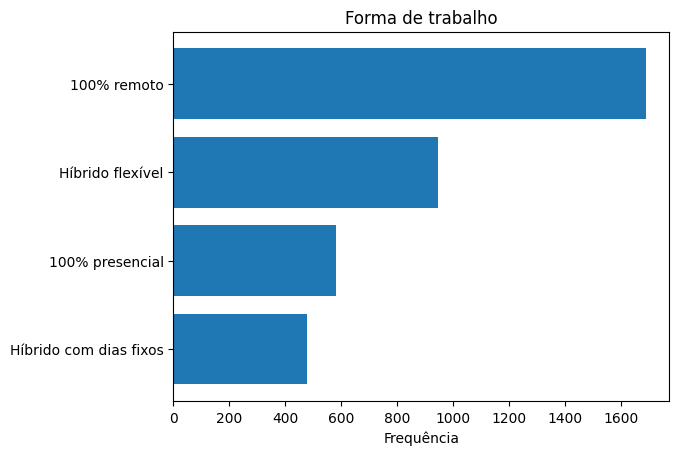

In [26]:
index = ['Híbrido com dias fixos', '100% presencial', 'Híbrido flexível', '100% remoto']
values = parte_2.groupby("('P2_p ', 'Atualmente qual a sua forma de trabalho?')")["('P2_p ', 'Atualmente qual a sua forma de trabalho?')"].count().sort_values(ascending=True).values

plt.barh(index, values)
plt.title('Forma de trabalho')
plt.xlabel('Frequência')

Adicionalmente, destaca-se a marcada predominância do trabalho remoto, tanto no formato completamente remoto quanto no modelo híbrido. No setor de Tecnologia da Informação, observa-se uma tendência crescente em relação ao trabalho remoto, impulsionada ainda mais pela influência da pandemia. Esta análise constata que a área de dados segue essa tendência, mantendo-se alinhada com as evoluções do setor.